# Weasley's Wizard Wheezes
You are in charge of an advertising campaign for Fred and George Weasley, who have invented a new brand of love potion, and they have given you a budget of 1 million galleons.  You can advertise on wizard TV or in magazines. One minute of TV costs 20,000 Galleons and reaches 1.8 million potential wizarding customers; a magazine page (in the Quibbler) costs 10,000 galleons and reaches 1 million. You must sign up for at least 10 minutes of TV time.

### How should you spend your budget to maximize your audience? Formulate the problem in GAMS and solve it. 

Hint: You should be able to do this without resetting and restarting.  In some cases you may want to fix a subset of the variables to zero.

In [1]:
# Load the gams extension
%load_ext gams_magic

%matplotlib inline
import matplotlib.pyplot as plt

__The GAMS Model:__

In [2]:
%%gams

Set
    i 'advertise'  / TV, magazines /
    
Variables
    x(i) 'minutes of advertise i'
    z   'total profits';
   
Positive Variable x;

Parameter
    costs(i) 'One minute costs'
        / TV          20000
          magazines   10000 /
    
    costumers(i) 'million potential wizarding customers'
        / TV           1800000
          magazines    1000000 /;           
            
Equation
    obj     'obj'
    budget  'total advertisement must be less than 1 million'
    minTV   'You must sign up for at least 10 minutes of TV time';

    minTV.. x('TV') =g= 10;
    budget.. sum(i,x(i)*costs(i)) =l= 1000000;
    obj.. sum(i,x(i)*costumers(i)) =e= z; 

model prob /all/;

Options LP  = Cplex;

Solve prob using LP maximizing z;

display z.l, x.l;


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),98000000.0,3,3,LP,CPLEX,0


In [3]:
%gams_pull z
results = {'No radio':z[0][0]}
results

{'No radio': 98000000.0}

It takes creative talent to create effective advertising; in your organization it takes three wizard-weeks to create a magazine page, and one wizard-week to create a TV minute. You have only 100 wizard-weeks available. Add this contraint to the model and determine how you should spend your budget.

In [6]:
%%gams

Set
    i 'advertise'  / TV, magazines /
    
Variables
    x(i) 'minutes of advertise i'
    z   'total profits';
   
Positive Variable x;

Parameter
    costs(i) 'One minute costs'
        / TV          20000
          magazines   10000 /
    
    costumers(i) 'million potential wizarding customers'
        / TV           1800000
          magazines    1000000 /

    weeks(i) 'wizard-week'
        / TV           1
          magazines    3 /;
            
Equation
    obj     'obj'
    budget  'total advertisement must be less than 1 million'
    minTV   'You must sign up for at least 10 minutes of TV time'
    budget2 'You have only 100 wizard-weeks available';

    minTV.. x('TV') =g= 10;
    budget.. sum(i,x(i)*costs(i)) =l= 1000000;
    budget2.. sum(i,x(i)*weeks(i)) =l= 100;
    obj.. sum(i,x(i)*costumers(i)) =e= z; 

model prob /all/;

Options LP  = Cplex;

Solve prob using LP maximizing z;

display z.l, x.l;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),92000000.0,4,3,LP,CPLEX,0.156


In [7]:
%gams_pull z
results['No radio and time limit'] = z[0][0]
results

{'No radio': 98000000.0, 'No radio and time limit': 92000000.0}

Radio advertising reaches a quarter million wizards per minute, costs 2,000 galleons/per minute and requires only 1 wizard-day of time. How does this medium affect your solutions?

In [9]:
%%gams

Set
    i 'advertise'  / TV, magazines, radio /
    
Variables
    x(i) 'minutes of advertise i'
    z   'total profits';
   
Positive Variable x;

Parameter
    costs(i) 'One minute costs'
        / TV          20000
          magazines   10000
          radio        2000 /
    
    costumers(i) 'million potential wizarding customers'
        / TV           1800000
          magazines    1000000
          radio         250000 /

    weeks(i) 'wizard-week'
        / TV           1
          magazines    3
          radio        1 /;
            
Equation
    obj     'obj'
    budget  'total advertisement must be less than 1 million'
    minTV   'You must sign up for at least 10 minutes of TV time'
    budget2 'You have only 100 wizard-weeks available';

    minTV.. x('TV') =g= 10;
    budget.. sum(i,x(i)*costs(i)) =l= 1000000;
    budget2.. sum(i,x(i)*weeks(i)) =l= 100;
    obj.. sum(i,x(i)*costumers(i)) =e= z; 

model prob /all/;

Options LP  = Cplex;

Solve prob using LP maximizing z;

display z.l, x.l;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),9.388889e+07,4,4,LP,CPLEX,0.016


In [10]:
%gams_pull z
results['Radio with time limit'] = z[0][0]
results

{'No radio': 98000000.0,
 'No radio and time limit': 92000000.0,
 'Radio with time limit': 93888888.8888889}

How does the solution change if you have to sign up for at least two magazine pages? 

In [11]:
%%gams

Set
    i 'advertise'  / TV, magazines, radio /
    
Variables
    x(i) 'minutes of advertise i'
    z   'total profits';
   
Positive Variable x;

Parameter
    costs(i) 'One minute costs'
        / TV          20000
          magazines   10000
          radio        2000 /
    
    costumers(i) 'million potential wizarding customers'
        / TV           1800000
          magazines    1000000
          radio         250000 /

    weeks(i) 'wizard-week'
        / TV           1
          magazines    3
          radio        1 /;
            
Equation
    obj     'obj'
    budget  'total advertisement must be less than 1 million'
    minTV   'You must sign up for at least 10 minutes of TV time'
    minmagazine 'You must sign up for at least two magazine pages'
    budget2 'You have only 100 wizard-weeks available';

    minTV.. x('TV') =g= 10;
    minmagazine.. x('magazines') =g= 2;
    budget.. sum(i,x(i)*costs(i)) =l= 1000000;
    budget2.. sum(i,x(i)*weeks(i)) =l= 100;
    obj.. sum(i,x(i)*costumers(i)) =e= z; 

model prob /all/;

Options LP  = Cplex;

Solve prob using LP maximizing z;

display z.l, x.l;


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),93700000.0,5,4,LP,CPLEX,0.016


In [12]:
%gams_pull z
results['Radio with time and mag limit'] = z[0][0]
results

{'No radio': 98000000.0,
 'No radio and time limit': 92000000.0,
 'Radio with time limit': 93888888.8888889,
 'Radio with time and mag limit': 93700000.0}

What if you require in addition a maximum of 120 minutes of radio? 

In [13]:
%%gams

Set
    i 'advertise'  / TV, magazines, radio /
    
Variables
    x(i) 'minutes of advertise i'
    z   'total profits';
   
Positive Variable x;

Parameter
    costs(i) 'One minute costs'
        / TV          20000
          magazines   10000
          radio        2000 /
    
    costumers(i) 'million potential wizarding customers'
        / TV           1800000
          magazines    1000000
          radio         250000 /

    weeks(i) 'wizard-week'
        / TV           1
          magazines    3
          radio        1 /;
            
Equation
    obj     'obj'
    budget  'total advertisement must be less than 1 million'
    minTV   'You must sign up for at least 10 minutes of TV time'
    minmagazine 'You must sign up for at least two magazine pages'
    maxradio 'you require in addition a maximum of 120 minutes of radio'
    budget2 'You have only 100 wizard-weeks available';

    minTV.. x('TV') =g= 10;
    minmagazine.. x('magazines') =g= 2;
    maxradio.. x('radio') =l= 120;
    budget.. sum(i,x(i)*costs(i)) =l= 1000000;
    budget2.. sum(i,x(i)*weeks(i)) =l= 100;
    obj.. sum(i,x(i)*costumers(i)) =e= z; 

model prob /all/;

Options LP  = Cplex;

Solve prob using LP maximizing z;

display z.l, x.l;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),93700000.0,6,4,LP,CPLEX,0.015


In [14]:
%gams_pull z
results['Radio with time, radio and mag limit'] = z[0][0]
results

{'No radio': 98000000.0,
 'No radio and time limit': 92000000.0,
 'Radio with time limit': 93888888.8888889,
 'Radio with time and mag limit': 93700000.0,
 'Radio with time, radio and mag limit': 93700000.0}

__Plot the objective function values for all 5 solves:__

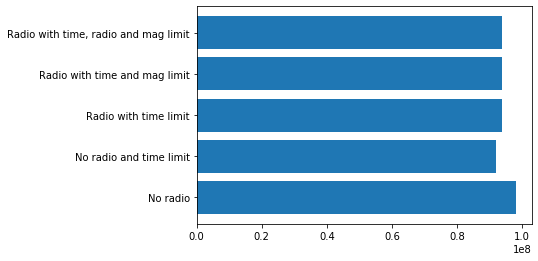

In [15]:
plt.barh(range(len(results)), list(results.values()), align='center')
plt.yticks(range(len(results)), list(results.keys()));